In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import seaborn as sb
import warnings
from sklearn.exceptions import DataConversionWarning, ConvergenceWarning
warnings.filterwarnings("ignore", category=(DataConversionWarning))
warnings.filterwarnings("ignore", category=(ConvergenceWarning))

df_lc=pd.read_csv("survey lung cancer.csv")
df_lc

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,1,2,2,2,1,2,YES


In [3]:
df_lc.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [4]:
df_lc.shape

(309, 14)

In [5]:
df_lc.isna().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_gender=pd.DataFrame(le.fit_transform(df_lc['GENDER']))
df_gender=df_gender.rename(columns={0:'GENDER_NEW'})
df_gender
df_lc=pd.concat([df_lc,df_gender], axis=1)
df_lc

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,GENDER_NEW
0,M,69,1,2,2,1,1,2,2,2,2,2,2,YES,1
1,M,74,2,1,1,1,2,1,1,1,2,2,2,YES,1
2,F,59,1,1,1,2,1,2,1,2,2,1,2,NO,0
3,M,63,2,2,2,1,1,1,2,1,1,2,2,NO,1
4,F,63,1,2,1,1,1,2,1,2,2,1,1,NO,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,1,2,2,2,2,1,YES,0
305,M,70,2,1,1,1,1,2,2,2,2,1,2,YES,1
306,M,58,2,1,1,1,1,2,2,2,1,1,2,YES,1
307,M,67,2,1,2,1,1,1,2,2,2,1,2,YES,1


In [7]:
df_lc_lung_cancer=pd.DataFrame(le.fit_transform(df_lc['LUNG_CANCER']))
df_lc_lung_cancer
df_lc_lung_cancer=df_lc_lung_cancer.rename(columns={0:'LUNG_CANCER_NEW'})
df_lc_lung_cancer
df_lc=pd.concat([df_lc, df_lc_lung_cancer], axis=1)
df_lc

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,GENDER_NEW,LUNG_CANCER_NEW
0,M,69,1,2,2,1,1,2,2,2,2,2,2,YES,1,1
1,M,74,2,1,1,1,2,1,1,1,2,2,2,YES,1,1
2,F,59,1,1,1,2,1,2,1,2,2,1,2,NO,0,0
3,M,63,2,2,2,1,1,1,2,1,1,2,2,NO,1,0
4,F,63,1,2,1,1,1,2,1,2,2,1,1,NO,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,1,2,2,2,2,1,YES,0,1
305,M,70,2,1,1,1,1,2,2,2,2,1,2,YES,1,1
306,M,58,2,1,1,1,1,2,2,2,1,1,2,YES,1,1
307,M,67,2,1,2,1,1,1,2,2,2,1,2,YES,1,1


In [8]:
df_lc=df_lc.drop(['GENDER','LUNG_CANCER'],axis=1)
df_lc

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,GENDER_NEW,LUNG_CANCER_NEW
0,69,1,2,2,1,1,2,2,2,2,2,2,1,1
1,74,2,1,1,1,2,1,1,1,2,2,2,1,1
2,59,1,1,1,2,1,2,1,2,2,1,2,0,0
3,63,2,2,2,1,1,1,2,1,1,2,2,1,0
4,63,1,2,1,1,1,2,1,2,2,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,56,1,1,1,2,2,1,2,2,2,2,1,0,1
305,70,2,1,1,1,1,2,2,2,2,1,2,1,1
306,58,2,1,1,1,1,2,2,2,1,1,2,1,1
307,67,2,1,2,1,1,1,2,2,2,1,2,1,1


In [9]:
df_lc.rename(columns = {'CHRONIC DISEASE': 'CHRONIC_DISEASE'}, inplace = True)
df_lc.rename(columns={'ALCOHOL CONSUMING': 'ALCOHOL_CONSUMING'}, inplace = True)
df_lc.rename(columns={'SHORTNESS OF BREATH': 'SHORTNESS_OF_BREATH'}, inplace = True)
df_lc.rename(columns={'SWALLOWING DIFFICULTY': 'SWALLOWING_DIFFICULTY'}, inplace = True)
df_lc.rename(columns={'CHEST PAIN': 'CHEST_PAIN'}, inplace = True)
df_lc

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,GENDER_NEW,LUNG_CANCER_NEW
0,69,1,2,2,1,1,2,2,2,2,2,2,1,1
1,74,2,1,1,1,2,1,1,1,2,2,2,1,1
2,59,1,1,1,2,1,2,1,2,2,1,2,0,0
3,63,2,2,2,1,1,1,2,1,1,2,2,1,0
4,63,1,2,1,1,1,2,1,2,2,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,56,1,1,1,2,2,1,2,2,2,2,1,0,1
305,70,2,1,1,1,1,2,2,2,2,1,2,1,1
306,58,2,1,1,1,1,2,2,2,1,1,2,1,1
307,67,2,1,2,1,1,1,2,2,2,1,2,1,1


In [10]:
dtypes=df_lc.dtypes
dtypes

AGE                      int64
SMOKING                  int64
YELLOW_FINGERS           int64
ANXIETY                  int64
PEER_PRESSURE            int64
CHRONIC_DISEASE          int64
WHEEZING                 int64
ALCOHOL_CONSUMING        int64
COUGHING                 int64
SHORTNESS_OF_BREATH      int64
SWALLOWING_DIFFICULTY    int64
CHEST_PAIN               int64
GENDER_NEW               int32
LUNG_CANCER_NEW          int32
dtype: object

In [11]:
from sklearn.model_selection import train_test_split
x=df_lc.drop(['LUNG_CANCER_NEW'],axis=1)
x
y=pd.DataFrame(df_lc['LUNG_CANCER_NEW'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape
y

,LUNG_CANCER_NEW
0,1
1,1
2,0
3,0
4,0
...,...
304,1
305,1
306,1
307,1


In [12]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Using SelectKBest to find the ranking of features that are closely relevant to the target variable "LUNG_CANCER"
# which uses statistical methods using chi2 library
top_features= SelectKBest(score_func=chi2,k=13)
top_features.fit(x_train,y_train)
top_features_ranked=pd.DataFrame(top_features.scores_, columns={0:'FEATURE_SCORES'})
# Renaming the score column
top_features_ranked=top_features_ranked.rename(columns={0:'FEATURE_SCORE'})
# Getting columns names from the xtrain dataset and concatenating with the feature scores
top=pd.concat([pd.DataFrame(x_train.columns),top_features_ranked],axis=1)
top_features_ranked=top.rename(columns={0:"FEATURE_NAME"}).nlargest(15,'FEATURE_SCORE',keep='all')
top_features_ranked

,FEATURE_NAME,FEATURE_SCORE
7,ALCOHOL_CONSUMING,4.081441
10,SWALLOWING_DIFFICULTY,3.138517
8,COUGHING,2.688603
6,WHEEZING,2.526787
0,AGE,1.846931
11,CHEST_PAIN,1.696437
4,PEER_PRESSURE,1.457184
2,YELLOW_FINGERS,1.343088
3,ANXIETY,0.958799
12,GENDER_NEW,0.846909


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, fbeta_score, recall_score, precision_score, matthews_corrcoef

lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
ab = AdaBoostClassifier()
gb = GradientBoostingClassifier()

models={
          #'lrm':lr,
        #  'dtm':dt,
        # 'rfm':rf,
        'abm':ab,
        #'gbm':gb
       }

dict_score={}
array_score={}
for i in models:
    model_fit=models[i].fit(x_train, y_train)
    model_pred=model_fit.predict(x_test)
    array_score.update({"accuracy score":accuracy_score(y_test, model_pred)})
    array_score.update({"precision score":precision_score(y_test, model_pred)})
    array_score.update({"recall score":recall_score(y_test, model_pred)})
    array_score.update(
      {"f1 score":f1_score(y_test, model_pred)})
    array_score.update({"fbeta score":fbeta_score(y_test, model_pred,beta=0.5)})
    key=models[i].__class__.__name__
    value=array_score
    dict_score.update({key:value})
    array_score={}
ds=pd.DataFrame(dict_score)
ds

,AdaBoostClassifier
accuracy score,0.983871
f1 score,0.991736
fbeta score,0.986842
precision score,0.983607
recall score,1.000000


In [14]:
ds.describe()

,AdaBoostClassifier
count,5.000000
mean,0.989211
std,0.006861
min,0.983607
25%,0.983871
50%,0.986842
75%,0.991736
max,1.000000


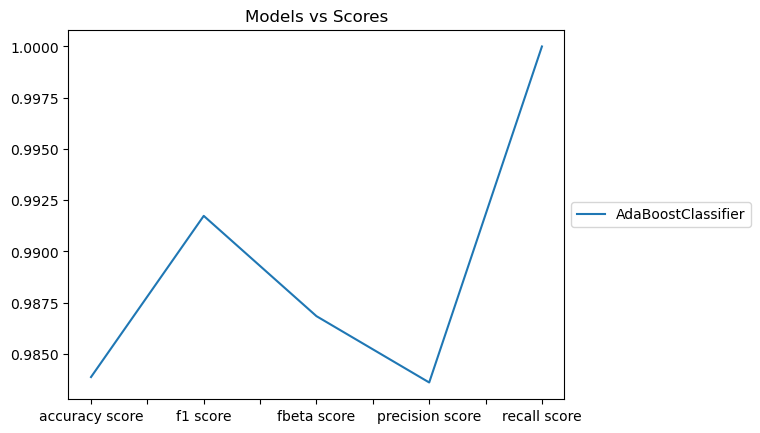

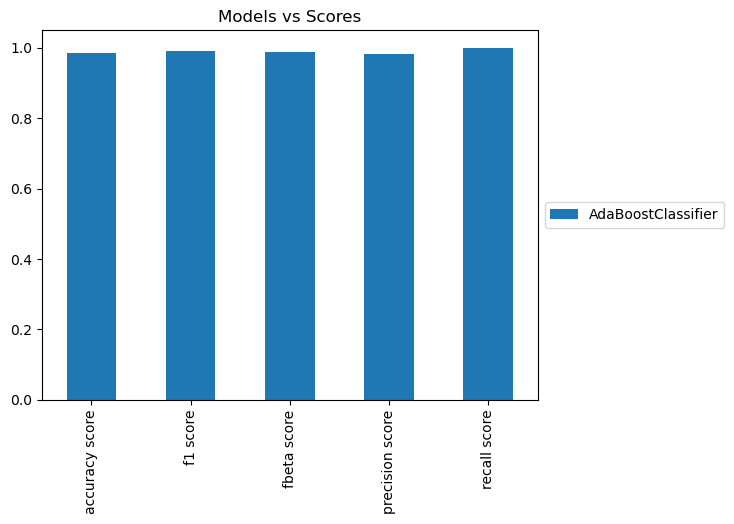

In [22]:
m.figure.Figure(figsize=(10,10))
plots=["line", "bar"]
for i in plots:
    ds.plot(kind=i,title="Models vs Scores",legend=True)
#     mp.ylim(0,1)
    mp.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    mp.show()

In [23]:
input_features = ["AGE", "SMOKING", "YELLOW_FINGERS", "ANXIETY", "PEER_PRESSURE", "CHRONIC_DISEASE", "WHEEZING", "ALCOHOL_CONSUMING", "COUGHING","SHORTNESS_OF_BREATH", "SWALLOWING_DIFFICULTY",  "CHEST_PAIN", "GENDER_NEW"]
input_values = [[69, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1]]
input_df = pd.DataFrame(input_values, columns=input_features)

prediction_gb = model_fit.predict(input_df)
print(prediction_gb)


[1]


In [24]:
import numpy as np
import warnings
input_values = [[69, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1]]

prediction = model_fit.predict(input_values)
print(prediction)


[1]


G:\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


In [25]:
import joblib

joblib.dump(model_fit, 'model_fit.joblib')
classifier = joblib.load('model_fit.joblib')

In [26]:
classifier

AdaBoostClassifier()

In [27]:
import sys
sys.version

'3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]'